<a href="https://colab.research.google.com/github/tm70/friendly-couscous/blob/master/Newton's_Fractal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

print("TF Version:", tf.__version__)
sess = tf.InteractiveSession()

TF Version: 1.14.0


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [ ]:
xmin = -4.0
xmax = 4.0
xstep = 0.01
xnum = 800 #(xmax-xmin)/xstep
ymin = -4.0
ymax = 4.0
ystep = 0.01
ynum = 800 #(ymax-ymin)/ystep

#initialise complex plane
X, Y = np.mgrid[xmin:xmax:xstep, ymin:ymax:ystep]
Z = X + 1j*Y
zs = tf.Variable(Z.astype(np.complex64))
tf.global_variables_initializer().run()

def f(x):
  return x**4 - 1

def fprime(x):
  return 4*x**3

#apply newton's method
zs_ = zs - (f(zs)/fprime(zs))
step = zs.assign(zs_)
for i in range(100):
  step.op.run()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: ComplexWarning: Casting complex values to real discards the imaginary part


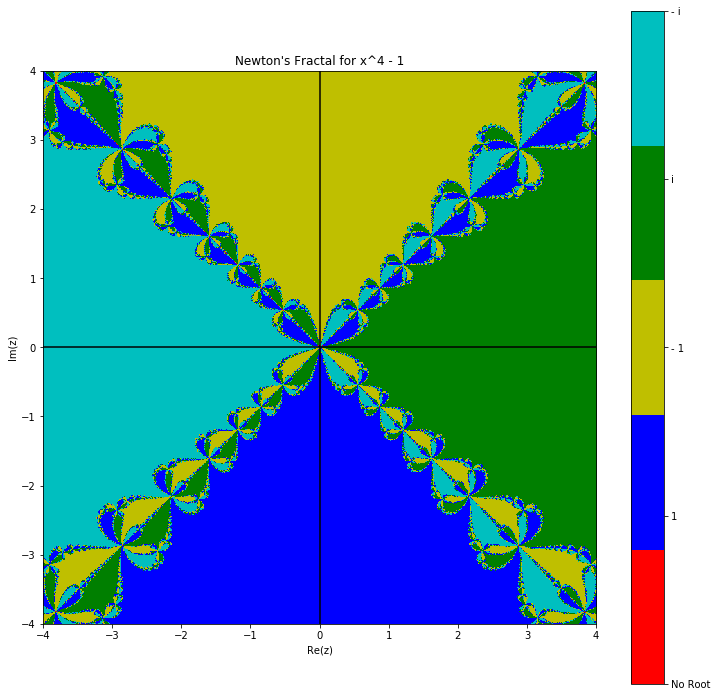

In [ ]:
#converts root estimates into integers for easier plotting
cutoff = 0.00001
def conv(x):
  if(abs(x-1) < cutoff):
    return 1
  elif(abs(x+1) < cutoff):
    return 2
  elif(abs(x-1j) < cutoff):
    return 3
  elif(abs(x+1j) < cutoff):
    return 4
  else:
    return 0

#convert to numpy array for plotting and convert values
z = zs.eval()
for i in range(xnum):
  for j in range(ynum):
    z[i][j] = conv(z[i][j])

cmap = ListedColormap(['r','b','y','g','c'])

#draw image
numxticks = 8
numyticks = 8
fig = plt.figure(figsize=(10,10))
plt.imshow(z.astype(int), cmap = cmap, interpolation = 'none', extent=[xmin, xmax, ymin, ymax])
plt.title("Newton's Fractal for x^4 - 1")
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.tight_layout(pad=0)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
cbar = plt.colorbar(ticks=[0,1,2,3,4])
cbar.ax.set_yticklabels(['No Root', '1', '- 1', 'i', '- i'])
plt.show()

In [ ]:
sess.close()